# Problem Framing

## Topic : Clock Speed (Freq) มีผลต่อ TDP หรือไม่
เราจะเทียบข้อมูลของ Freq และ TDP  ว่ามีความสัมพันธ์กันอย่างไร

# Data collection
เราจะใช้ข้อมูลทุติยภูมิ โดย import csv file มาจาก dataset ใน website kaggle

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Read CSV file

In [2]:
df = pd.read_csv('./chip_dataset.csv')
df

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


# Data Preparation

## 1. Scope Table to interest one and clear the one we don't

In [3]:
df_new = df.loc[: , 'Product' : 'Vendor']
df_new

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA


## 2.Drop Duplicate

In [4]:
df_new = df_new.drop_duplicates(subset = ['Product'] , keep = 'first') #dropping duplicates data
df_new

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
4846,NVIDIA Playstation 3 GPU 28nm,GPU,2013-06-03,28.0,21.0,68.0,302.0,550.0,Sony,NVIDIA
4847,XGI Volari V3,GPU,2003-09-15,130.0,NaN,NaN,25.0,200.0,UMC,Other
4848,NVIDIA GeForce FX Go5100,GPU,2003-03-01,150.0,NaN,124.0,45.0,200.0,TSMC,NVIDIA
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA


## 3. Drop NaN of Freq and TDP

In [5]:
df_new.dropna(subset = ['TDP (W)' , 'Freq (MHz)'] , inplace = True) #dropping NaN value in column we interest
df_new

C:\Users\TEE_R\AppData\Local\Temp\ipykernel_31860\478912097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset = ['TDP (W)' , 'Freq (MHz)'] , inplace = True) #dropping NaN value in column we interest


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
4841,NVIDIA GeForce 6800 Ultra DDL,GPU,2004-04-14,130.0,100.0,287.0,222.0,400.0,TSMC,NVIDIA
4844,ATI FirePro V7800,GPU,2010-04-26,40.0,150.0,334.0,2154.0,700.0,TSMC,ATI
4845,NVIDIA Tegra 3 GPU,GPU,2011-11-09,40.0,20.0,80.0,10.0,416.0,TSMC,NVIDIA
4846,NVIDIA Playstation 3 GPU 28nm,GPU,2013-06-03,28.0,21.0,68.0,302.0,550.0,Sony,NVIDIA


## 4. Split table By Group CPU and GPU

In [6]:
df_cpu = df_new[df['Type'] == "CPU"]
df_gpu = df_new[df['Type'] == "GPU"]

C:\Users\TEE_R\AppData\Local\Temp\ipykernel_31860\3446607962.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cpu = df_new[df['Type'] == "CPU"]
C:\Users\TEE_R\AppData\Local\Temp\ipykernel_31860\3446607962.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gpu = df_new[df['Type'] == "GPU"]


### CPU table :

In [7]:
df_cpu.reset_index(inplace = True , drop = True) # reset index of cpu table
df_cpu

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
1912,Intel Core i3-7100T,CPU,2017-01-03,14.0,35.0,NaN,NaN,3400.0,Intel,Intel
1913,Intel Core i7-9850H,CPU,2019-04-23,14.0,45.0,149.0,NaN,2600.0,Intel,Intel
1914,Intel Xeon Gold 6312U,CPU,2021-04-06,10.0,185.0,NaN,NaN,2400.0,Intel,Intel
1915,AMD Ryzen 9 4900H,CPU,2020-03-16,7.0,54.0,156.0,9800.0,3300.0,TSMC,AMD


### GPU table:

In [8]:
df_gpu.reset_index(inplace = True , drop = True) #reset index of gpu table
df_gpu

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,Intel Xeon E3-1275,GPU,2011-04-03,32.0,95.0,216.0,1160.0,100.0,Intel,Intel
1,NVIDIA GeForce MX150 GP107,GPU,2019-02-23,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA
2,ATI Radeon HD 4350 AGP,GPU,2008-09-30,55.0,20.0,73.0,242.0,600.0,TSMC,ATI
3,ATI Radeon X700 AGP,GPU,2004-09-01,110.0,44.0,156.0,120.0,400.0,TSMC,ATI
4,ATI Radeon HD 2900 PRO,GPU,2007-12-12,80.0,200.0,420.0,720.0,600.0,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
1815,NVIDIA GeForce 6800 Ultra DDL,GPU,2004-04-14,130.0,100.0,287.0,222.0,400.0,TSMC,NVIDIA
1816,ATI FirePro V7800,GPU,2010-04-26,40.0,150.0,334.0,2154.0,700.0,TSMC,ATI
1817,NVIDIA Tegra 3 GPU,GPU,2011-11-09,40.0,20.0,80.0,10.0,416.0,TSMC,NVIDIA
1818,NVIDIA Playstation 3 GPU 28nm,GPU,2013-06-03,28.0,21.0,68.0,302.0,550.0,Sony,NVIDIA


## 5. Detecting and clear data out of outlier

### CPU :

In [9]:
df_cpu_spec = df_cpu[['Product' , 'Type' , 'TDP (W)' , 'Freq (MHz)']] #scoping to more we interest
df_cpu_spec

,Product,Type,TDP (W),Freq (MHz)
0,AMD Athlon 64 3500+,CPU,45.0,2200.0
1,AMD Athlon 200GE,CPU,35.0,3200.0
2,Intel Core i5-1145G7,CPU,28.0,2600.0
3,Intel Xeon E5-2603 v2,CPU,80.0,1800.0
4,AMD Phenom II X4 980 BE,CPU,125.0,3700.0
...,...,...,...,...
1912,Intel Core i3-7100T,CPU,35.0,3400.0
1913,Intel Core i7-9850H,CPU,45.0,2600.0
1914,Intel Xeon Gold 6312U,CPU,185.0,2400.0
1915,AMD Ryzen 9 4900H,CPU,54.0,3300.0


<Axes: >

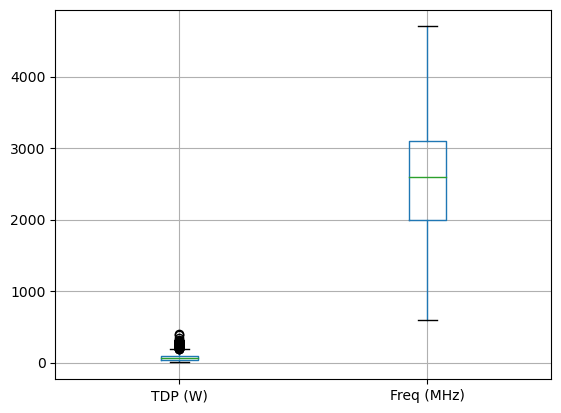

In [10]:
df_cpu_spec.boxplot() #Check data